In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # select petal length & width
y = (iris.target ==0).astype(np.int) # Iris setosa

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [2]:
y_pred

array([1])

In [3]:
import matplotlib.pyplot as plt


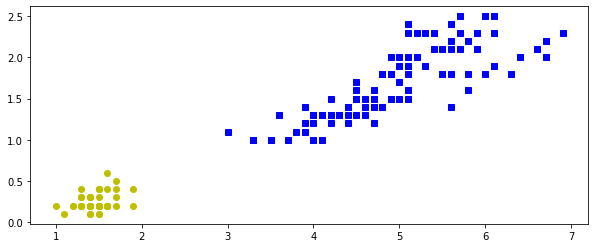

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

In [5]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.4.1'

In [6]:
keras.__version__

'2.4.0'

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [14]:
# build neural network with 2 hidden layers
model = keras.models.Sequential() # Sequential Model (simplest of Keras model)
# can also set keras.layers.InputLayer
model.add(keras.layers.Flatten(input_shape=[28,28])) # first layer: convert img into 1D array
# Dense hidden layer w/ 300 neurs. Use ReLU activation function
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
# first layer has 784 x 300 connection weights + 300 bias terms (235500)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [18]:
model.layers

In [19]:
hidden1 = model.layers[1]

In [20]:
hidden1.name

'dense_3'

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights

array([[-0.00784788,  0.04676855,  0.05872281, ...,  0.00677265,
        -0.02641065,  0.06778026],
       [ 0.05431528, -0.01077864,  0.00633538, ..., -0.06027362,
         0.03962334,  0.07068615],
       [-0.04970165,  0.02086401, -0.01984543, ...,  0.05007813,
        -0.06606778,  0.06967948],
       ...,
       [ 0.07100025,  0.05209029, -0.06805269, ..., -0.04881179,
        -0.0459912 ,  0.01283608],
       [ 0.0043332 ,  0.02290675,  0.0508765 , ..., -0.01249076,
         0.06020691, -0.00824904],
       [-0.01764615, -0.05792835, -0.03509231, ..., -0.01806153,
        -0.07278354,  0.0434836 ]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

In [26]:
# sparse_categorical_crossentropy - sparse labels (0-9 target class index)
# sgd - train using Stoichastic Gradient Descent
# thus Keras does backpropagation algorithm - reverse-model autodiff plus SGD
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [27]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0055 - accuracy: 0.6881 - val_loss: 0.5026 - val_accuracy: 0.8322
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5026 - accuracy: 0.8244 - val_loss: 0.4402 - val_accuracy: 0.8536
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4523 - accuracy: 0.8425 - val_loss: 0.4293 - val_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4232 - accuracy: 0.8514 - val_loss: 0.3960 - val_accuracy: 0.8664
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4090 - accuracy: 0.8572 - val_loss: 0.3879 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3830 - accuracy: 0.8658 - val_loss: 0.3709 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3664 - accuracy: 0.8717 - val_loss: 0.4015 - val_accuracy:

In [28]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [29]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


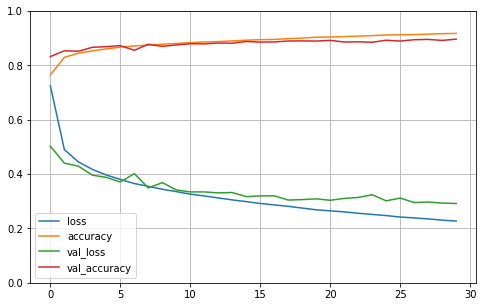

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 75.8578 - accuracy: 0.8316


[75.85778045654297, 0.83160001039505]

In [32]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)